# The Network among Sentential Co-Occurrences 
# of Noun Phrases in "*Kalevala*"
## By the DH in Estonia 2016 Conference Team

**IMPORTANT**: To use this notebook, you'll need to

1. Install IPython Notebook (easiest way: use [Anaconda](http://store.continuum.io))
2. Download this notebook and all other Python scripts used here from github.
3. Run `ipython notebook` in the same directory where notebook and scripts were put

<a href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

### Importing Python Modules 

In [1]:
import random
import nltk
import codecs
from textblob import TextBlob
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import imp
from ipywidgets import widgets
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
%load_ext autoreload

## I. Importing the Text of *Kalevala*

In [2]:
filename = 'Kalevala.txt'
titlename = "Kalevala"

f = codecs.open(filename, "r", encoding="utf-8").readlines()

num_lines = 0
num_words = 0
num_chars = 0
for line in f:
    words = line.split()
    num_lines += 1
    num_words += len(words)
    num_chars += len(line)
print "%s has number of words = %i (and number of characters/symbols = %i)" %(titlename,num_words,num_chars)
# print "%s has number of words = %i" %(titlename,num_words)
blob = TextBlob("\n".join(f))

Kalevala has number of words = 136388 (and number of characters/symbols = 877358)


## II. Extracting the Most Frequent Noun Phrases in *Kalevala*

In [3]:
# nltk.download()

In [5]:
all_sents=blob.sentences
occurdic=Counter()
for sen in all_sents:
    dd=sen.dict
    for np in dd['noun_phrases']:
        occurdic[np]+=1

df = pd.DataFrame(columns=["%s Noun Phrases" %titlename, "Frequencies"])
u=1
for l,v in occurdic.items(): 
    df.loc[u]=[l,v]
    u+=1

print "The total number of noun phrases in %s is %i." %(titlename,len(df))#len(npA))
df.sort(["Frequencies"], ascending=[0])

cut = 90
df = df[df['Frequencies']>cut].sort(["Frequencies"], ascending=[0])
print "The total number of noun phrases in %s with frequencies > %i is %i." %(titlename,cut,len(df))#len(npA))
df.sort(["Frequencies"], ascending=[0])

The total number of noun phrases in Kalevala is 8065.
The total number of noun phrases in Kalevala with frequencies > 90 is 19.


,Kalevala Noun Phrases,Frequencies
6153,wainamoinen,457.0
3870,northland,346.0
6167,lemminkainen,298.0
1548,spake,252.0
234,ilmarinen,250.0
1309,thou,233.0
305,never,214.0
6599,pohyola,193.0
1403,kalevala,145.0
2896,ukko,134.0


In [6]:
excluded = ['thou','spake','never','thereupon','quick','till','who']

In [7]:
%autoreload 2

selectedTerms={}
# excluded = ['who','will','exactly','enough','shall','suppose','well']
for k in df["Kalevala Noun Phrases"].tolist(): #df["Plato's Phaedrus Noun Phrases"].tolist():
    if k not in excluded:
        selectedTerms[k] = k.capitalize()

# tool= imp.load_source('tools', utilsdir+'/tools.py')
import tools as tool
create_pandas_dataframe_from_text=tool.create_pandas_dataframe_from_text  
dfst,sec_prot,coccurlist,occurlist,dflines=create_pandas_dataframe_from_text(blob,selectedTerms,selectedTerms,titlename)
# print len(sec_prot.nodes()), sec_prot.nodes()
# dfst.sort_values(by='Frequencies').sort(["Frequencies"], ascending=[0])

prot_pol_sub=dflines[['protagonists','#_of_protagonists','polarity','subjectivity']].reset_index()
prot_pol_sub['sentence_id']=prot_pol_sub.index
prot_pol_sub=prot_pol_sub[['sentence_id','protagonists','#_of_protagonists','polarity','subjectivity']]

cuts = 1
prot_pol_sub = prot_pol_sub[prot_pol_sub['#_of_protagonists']>cuts]
# lp = prot_pol_sub['protagonists'].tolist()
# lpn = []
# control_dic={}
# for i in lp:
#     for j in i:
#         lpn.append(j)
#         if j not in control_dic:
#             print j,'0, 1, 2'
#             control_dic[j]=int(raw_input())
# # print lpn
# # print control_dic
# # len(set(lpn))
# for nd in sec_prot.nodes():
#     if nd not in control_dic:
#         continue
#     dici=sec_prot.node[nd]
#     sec_prot.add_node(nd,attr_dic=dici,type=control_dic[nd])
print "The total number of sentences in %s with at least %i selected noun phrases in each one of them is %i." %(titlename,cuts+1,len(prot_pol_sub))
prot_pol_sub.rename(columns={'protagonists':'list_of_selected_noun_phrases','#_of_protagonists':'#_of_selected_noun_phrases'},inplace=True)
prot_pol_sub.sort(["#_of_selected_noun_phrases"], ascending=[0]) #.drop('sentence_id', 1)
ddff = prot_pol_sub.drop('sentence_id', 1)
ddff.index.name = 'sentence_id'
ddff

The total number of sentences in Kalevala with at least 2 selected noun phrases in each one of them is 488.


,list_of_selected_noun_phrases,#_of_selected_noun_phrases,polarity,subjectivity
sentence_id,,,,
47,"[Louhi, Sun]",2.0,0.000000,0.000000
49,"[Sun, Wainamoinen]",2.0,0.000000,0.000000
126,"[Sariola, Sun]",2.0,0.035354,0.414141
127,"[Lemminkainen, Ukko]",2.0,0.400000,0.900000
130,"[Wainamoinen, Ukko]",2.0,0.000000,0.000000
131,"[Sun, Ukko]",2.0,0.365179,0.702679
134,"[Louhi, Kalevala, Wainamoinen, Pohyola]",4.0,-0.087500,0.506944
138,"[Sun, Northland]",2.0,0.400000,0.700000
142,"[Sun, Lemminkainen]",2.0,0.066667,0.466667


In [9]:
# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# ndfl=dflines[dflines['#_of_protagonists']>0  ]

# fig, ax = plt.subplots(figsize=[12, 10])
# axes2 = zoomed_inset_axes(ax, 6, loc=5)  # zoom = 6

# dflines['#_of_protagonists'].plot.hist(ax=ax)

# ax.set_xlabel('#_of_Characters')
# ax.set_ylabel('Frequency')
# ax.set_title('Histogram of # of noun phrases')

# x1, x2, y1, y2 = 2.9, 3., 0, 25
# axes2.set_xlim(x1, x2)
# axes2.set_ylim(y1, y2)
# ndfl['#_of_protagonists'].plot.hist(ax=axes2)
# axes2.set_ylabel('Frequency')

# mark_inset(ax, axes2, loc1=2, loc2=4, fc="none", ec="0.5")
# axes3 = zoomed_inset_axes(ax, 6, loc=10)

# x1, x2, y1, y2 = 2, 2.05, 0, 50
# axes3.set_xlim(x1, x2)
# axes3.set_ylim(y1, y2)
# ndfl['#_of_protagonists'].plot.hist(ax=axes3)
# axes3.set_ylabel('Frequency')

# mark_inset(ax, axes3, loc1=2, loc2=4, fc="none", ec="0.5")

# plt.show()

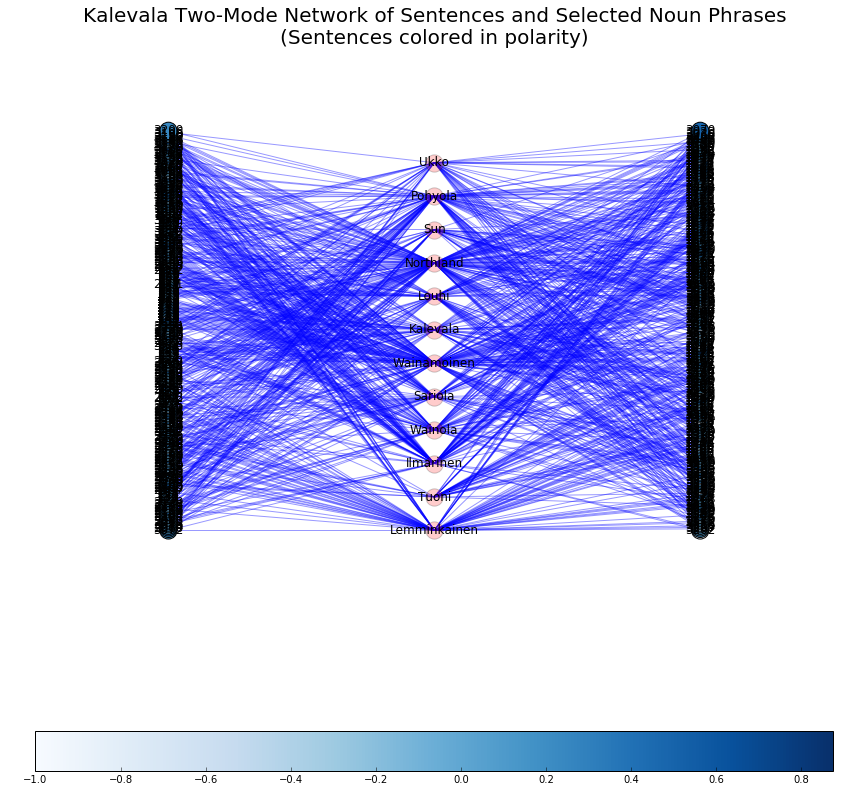

In [10]:
%autoreload 2

draw_network_node_color=tool.draw_network_node_color
sstt="%s Two-Mode Network of Sentences and Selected Noun Phrases" %titlename
pos=nx.spring_layout(sec_prot)
# pos=DefaultDict
nds=[nd for nd in sec_prot.nodes() if isinstance(nd,int)]
prot=[nd for nd in sec_prot.nodes() if nd not in nds]
# ncont=dict(control_dic)
# print ncont
# ncont[u'Midas']=0
# prot.append('Midas')
# protag=[nd for nd in prot if int(ncont[nd])==0 ]
# pos={nd:{0:0,1:0} for nd in sec_prot}
# nprotag=[nd for nd in prot if  int(ncont[nd])==1 or int(ncont[nd])==2]
# print protag
# print nprotag
for en,nd in enumerate(nds):
    if en<len(nds)/2.:
        pos[nd][0]=-1
        pos[nd][1]=en*2./len(nds)
    else:
        pos[nd][0]=1
        pos[nd][1]=(en-len(nds)/2.)*2./len(nds)
for en ,nd in enumerate(prot):
    pos[nd][0]=0
    pos[nd][1]=en*1./len(prot)
# for en ,nd in enumerate(protag):
#     pos[nd][0]=.5
#     pos[nd][1]=en*1./len(protag)
# for en ,nd in enumerate(nprotag):
#     pos[nd][0]=-.5
#     pos[nd][1]=en*1./len(nprotag)
# print pos    
possit=draw_network_node_color(sec_prot,sstt,pos=pos,with_edgewidth=False,withLabels=True,labfs=12,valpha=0.2,
                               ealpha=0.4,labelfont=15,with_node_weight=False,node_size_fixer=300.,node_col='polarity')

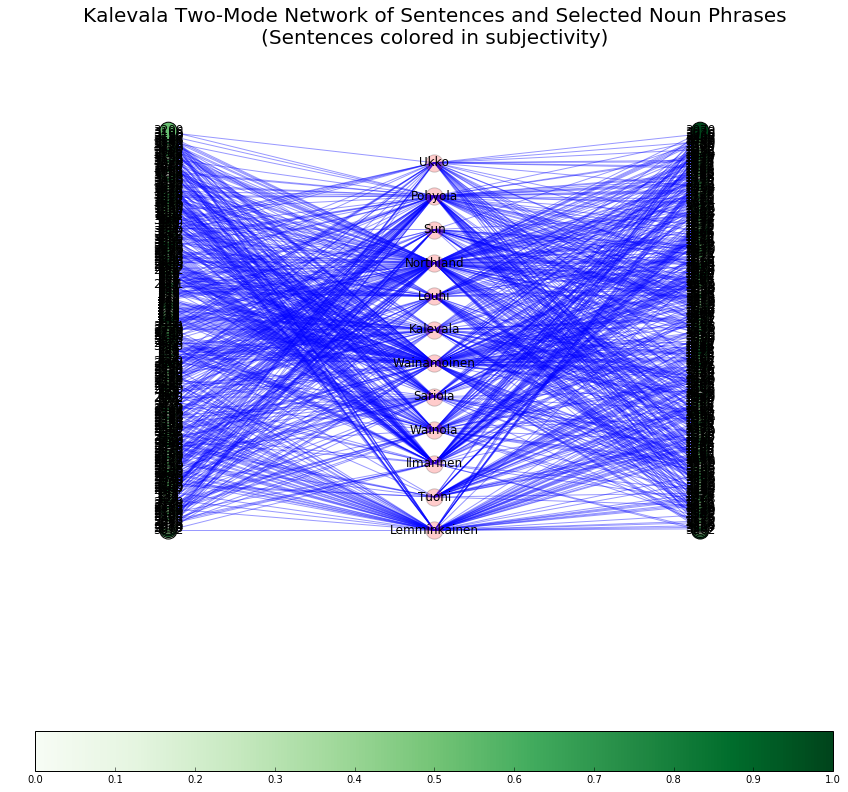

In [11]:
possit=draw_network_node_color(sec_prot,sstt,pos=pos,with_edgewidth=False,withLabels=True,labfs=12,valpha=0.2,
                               ealpha=0.4,labelfont=15,with_node_weight=False,node_size_fixer=300.,
                               node_col='subjectivity',colormat='Greens')

## III. Constructing the Network of Sententially Co-Occurring Noun Phrases in *Kalevala*

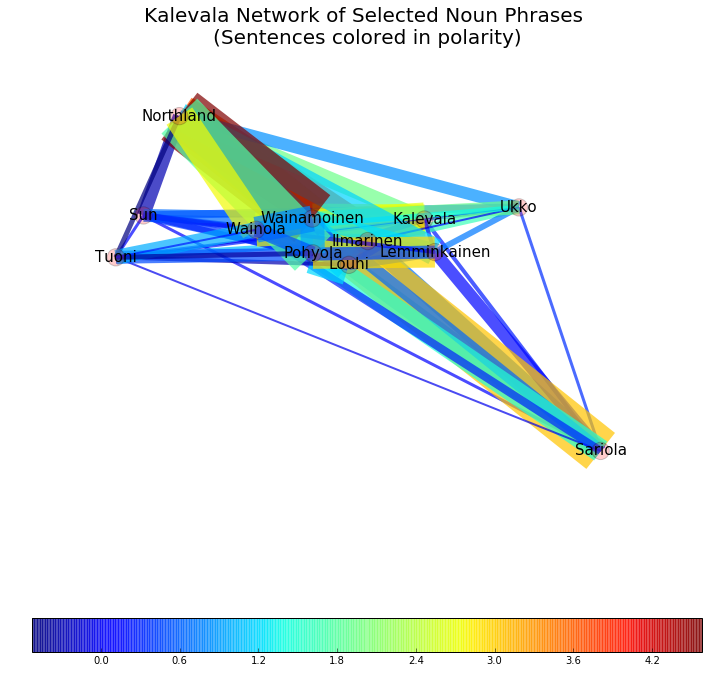

In [12]:
%autoreload 2

plist = prot_pol_sub['list_of_selected_noun_phrases'].tolist()
pplist=prot_pol_sub['polarity'].tolist()
nplist=prot_pol_sub['#_of_selected_noun_phrases'].tolist()
splist=prot_pol_sub['subjectivity'].tolist()

G = tool.make_graph_from_lists(plist,pplist,nplist,splist)
# print G.nodes(data=True)
# for nd in G.nodes():
#     G.add_node(nd,type=control_dic[nd])
posg=nx.spring_layout(G,scale=50)#,k=0.55)#,iterations=20)
# nodescolor={}
# npos={}
# d=40
# for nd in G.nodes():
#     opos=posg[nd]

#     if nd in protag:
#         nodescolor[nd]='r'
#         npos[nd]=[opos[0],opos[1]-d]
#     else:
#         nodescolor[nd]='g'
#         npos[nd]=[opos[0],opos[1]+d]
# npos={v:k for v,k in pos.items() if v in G}        

# sstt="%s Network of Selected Noun Phrases \n(Assortativity coefficient of Persons - Entities = %.4f)" %(titlename,nx.attribute_assortativity_coefficient(G,'type'))
sstt="%s Network of Selected Noun Phrases \n(Sentences colored in polarity)" %titlename
possit=tool.draw_network(G,sstt,pos=posg,with_edgewidth=True,withLabels=True,labfs=15,valpha=0.2,ealpha=0.7,labelfont=15,
                   with_edgecolor=True,edgecolor='polarity',colormat='Blues') #npos ,node_col=nodescolor False

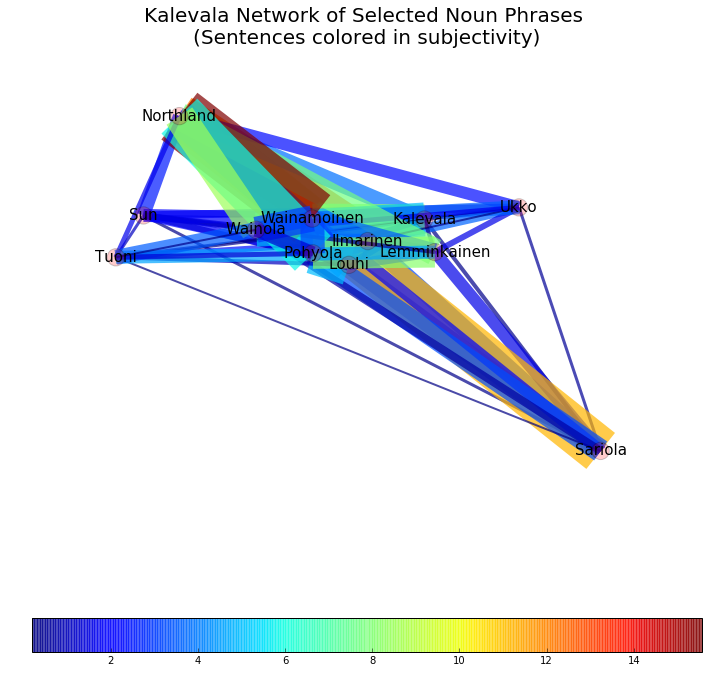

In [13]:
sstt="%s Network of Selected Noun Phrases \n(Sentences colored in subjectivity)" %titlename
possit=tool.draw_network(G,sstt,pos=posg,with_edgewidth=True,withLabels=True,labfs=15,valpha=0.2,ealpha=0.7,labelfont=15,
                   with_edgecolor=True,edgecolor='subjectivity',colormat='Greys')

## IV. Centralities of Nodes in the Network of Sententially Co-Occurring Noun Phrases in *Kalevala*

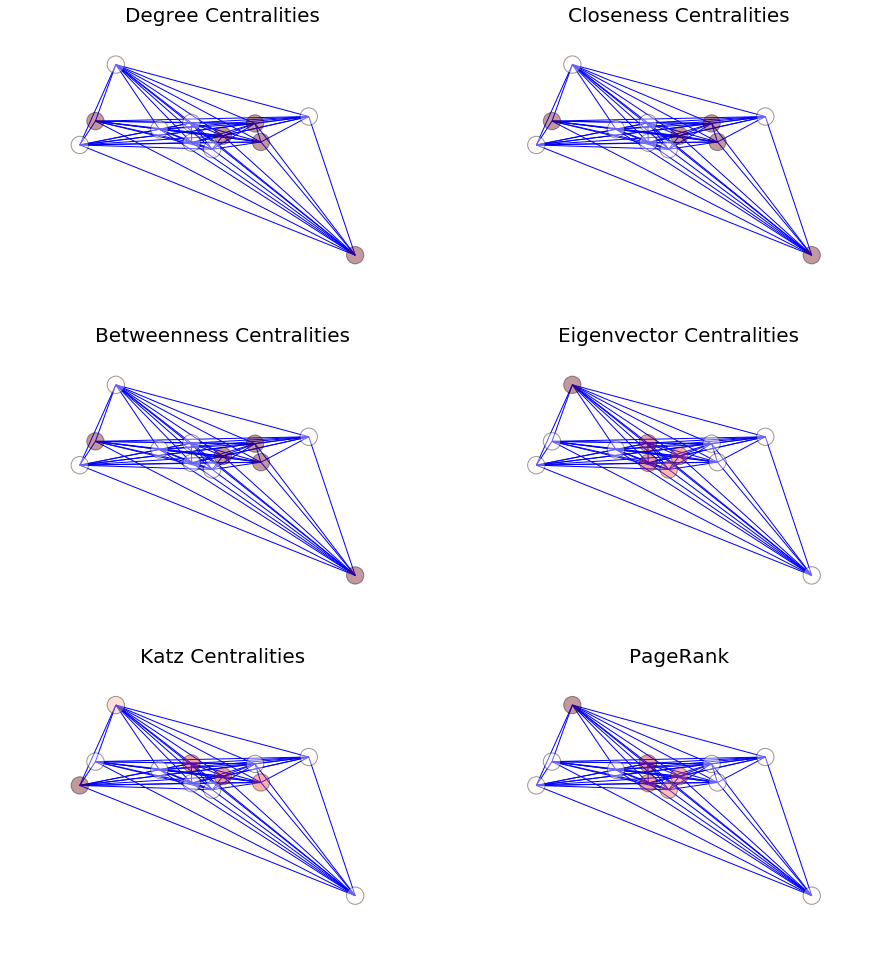

In [14]:
centrali=tool.draw_centralities_subplots(G,pos=posg,withLabels=False,labfs=5,figsi=(15,22),ealpha=1,vals=True)

### The table of Centralities of Nodes in the Network of Sententially Co-Occurring Noun Phrases in *Kalevala*

In [13]:
dfc=pd.DataFrame()
u=0
for i,k in centrali.items():
    dfc.insert(u,i,k.values())
    u+=1
dfc.insert(0,'Nodes',centrali[centrali.keys()[0]].keys())
# dfc
# dfc.insert(0,'Nodes',centrali[centrali.keys()[0]].keys())
dfc.columns=['Nodes','Closeness_Centrality', 'Katz_Centrality','Betweenness_Centrality', 'PageRank', 'Eigenvector_Centrality','Degree_Centrality']
dfc=dfc[['Nodes','Degree_Centrality','Closeness_Centrality','Betweenness_Centrality','Eigenvector_Centrality','Katz_Centrality','PageRank']]

# cols = list(dfc.columns.values)
# print "Centralities of nodes of %s sorted by closeness and betweenness centralities:" %name 
# print
dfc.sort(['Betweenness_Centrality','Closeness_Centrality'], ascending=[0,0])

,Nodes,Degree_Centrality,Closeness_Centrality,Betweenness_Centrality,Eigenvector_Centrality,Katz_Centrality,PageRank
14,Kalevide,0.714286,0.777778,0.388278,0.590116,-0.099263,0.209528
9,Kalev,0.642857,0.736842,0.304029,0.317680,-0.189511,0.111678
4,Finnish,0.214286,0.560000,0.142857,0.066242,-0.145640,0.059073
8,Sarvik,0.500000,0.636364,0.113553,0.343092,-0.131465,0.084322
10,Esthonia,0.357143,0.583333,0.053114,0.226763,0.313355,0.055613
3,Alevide,0.357143,0.583333,0.018315,0.257093,-0.301661,0.056390
0,Põrgu,0.214286,0.500000,0.009158,0.066157,0.529898,0.028616
6,Finland,0.285714,0.560000,0.003663,0.333458,0.136168,0.071606
1,Olev,0.214286,0.500000,0.000000,0.270035,-0.284899,0.051370
7,Old woman,0.142857,0.500000,0.000000,0.021599,0.145424,0.020509


## V. Communities of Nodes in the Network of Sententially Co-Occurring Noun Phrases in *Kalevala*

Number of communities of Kalevala Network of Selected Noun Phrases 
(Sentences colored in subjectivity) = 2
Community partition of Kalevala Network of Selected Noun Phrases 
(Sentences colored in subjectivity):
[[u'Sariola', u'Ilmarinen', u'Louhi', u'Lemminkainen', u'Northland', u'Pohyola', u'Tuoni'], [u'Sun', u'Kalevala', u'Ukko', u'Wainamoinen', u'Wainola']]
Community modularity of Kalevala Network of Selected Noun Phrases 
(Sentences colored in subjectivity) = 0.0504


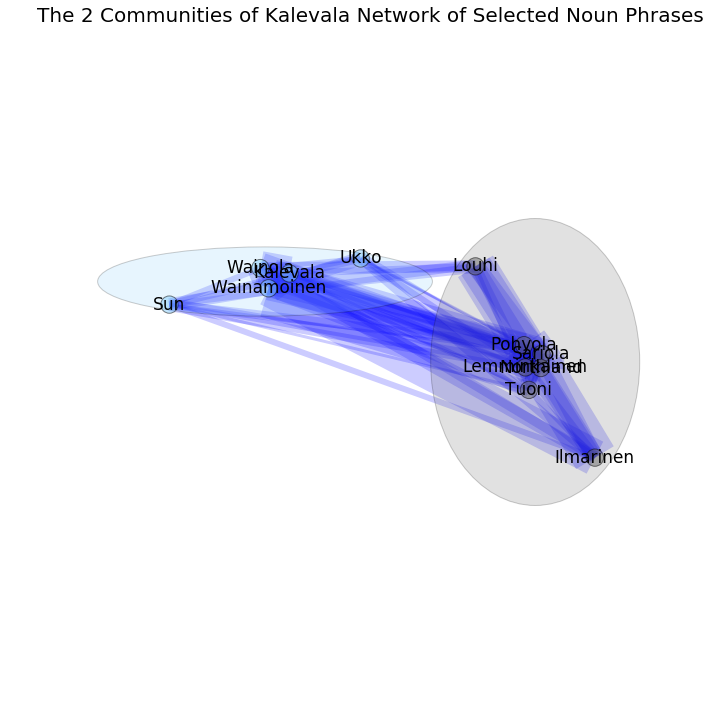

In [16]:
%autoreload 2

part,nodper=tool.print_communities(G,sstt)

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=0.2
vcc={}
sstta="The %s Communities of %s Network of Selected Noun Phrases" %(max(part.values())+1,titlename)#sstt)

tool.draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper,sstta,titlefont=20,labelfont=17,valpha=0.5)